This code seeks to graph the cases of coronavirus in Colombia and its progress.

In [1]:
#plot data

In [314]:
import pandas as pd
import numpy as np
data=pd.read_csv("~/Downloads/Casos1.csv")
data.head()

,ID de caso,Fecha de diagnóstico,Ciudad de ubicación,Departamento,Atención,Edad,Sexo,Tipo*,País de procedencia
0,1.0,06/03/2020,Bogotá,Bogotá,recuperado,10 a 19,F,Importado,Italia
1,2.0,09/03/2020,Buga,Valle,recuperado,30 a 39,M,Importado,España
2,3.0,09/03/2020,Medellín,Antioquia,recuperado,50 a 59,F,Importado,España
3,4.0,11/03/2020,Medellín,Antioquia,casa,50 a 59,M,Relacionado,Colombia
4,5.0,11/03/2020,Medellín,Antioquia,recuperado,20 a 29,M,Relacionado,Colombia


In [36]:
data = data.dropna() #Drop rows with NaN in its value

In [210]:
count = data["Fecha de diagnóstico"].value_counts() #Find the frequency of cases per day
freq = pd.DataFrame([count]).T
freq = freq.reset_index()
freq.columns = ['fecha_de_diagnostico', 'frecuencia']
freq = freq.sort_values(by='fecha_de_diagnostico', ascending= True)
freq.head()

,fecha_de_diagnostico,frecuencia
16,06/03/2020,1
15,09/03/2020,2
12,11/03/2020,6
13,12/03/2020,4
14,13/03/2020,3


[Text(0, 0.5, 'Number of people diagnosed'),
 Text(0.5, 0, 'Date'),
 Text(0.5, 1.0, 'Coronavirus in Colombia')]

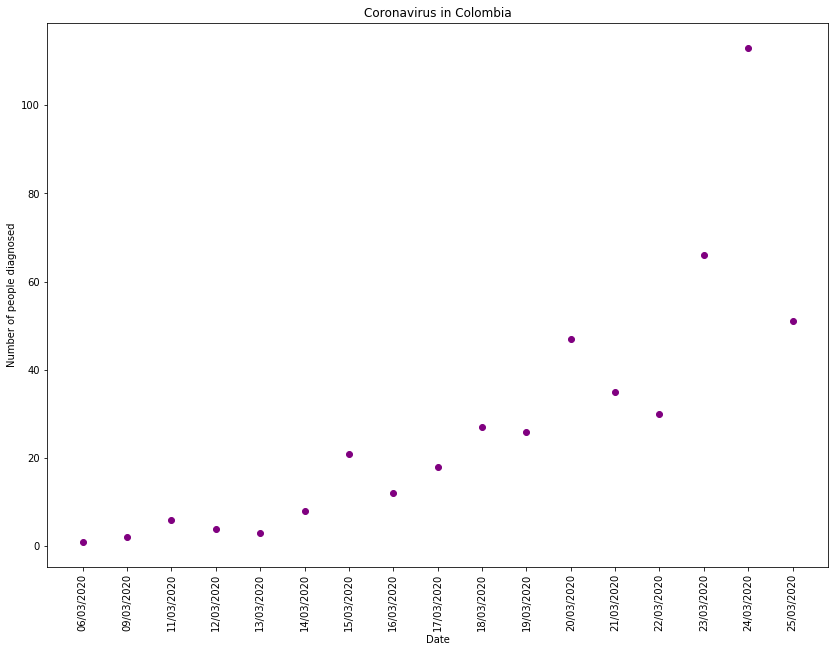

In [179]:
#Plot the data
fig, ax = plt.subplots(figsize=(14, 10))
ax.scatter(freq['fecha_de_diagnostico'],freq['frecuencia'],color='purple')
plt.xticks(rotation=90)
ax.set(xlabel="Date",
       ylabel="Number of people diagnosed",
       title="Coronavirus in Colombia")

### Linear Regression with one variable

In [211]:
freq.insert(0, 'dia', range(1, 1 + len(freq)))
freq.head()

,dia,fecha_de_diagnostico,frecuencia
16,1,06/03/2020,1
15,2,09/03/2020,2
12,3,11/03/2020,6
13,4,12/03/2020,4
14,5,13/03/2020,3


In [215]:
X = freq.loc[:,["dia"]] #Feature
X.insert(0,"0",1)
y = freq.loc[:,["frecuencia"]] #target variable

In [265]:
iters = 1000
alpha = 0.01
theta = np.matrix(np.array([0,0]))
X = np.matrix(X)
y = np.matrix(y)

In [266]:
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [267]:
computeCost(X,y,theta)

779.5294117647059

In [268]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

In [269]:
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

matrix([[-13.49494953,   4.61131753]])

Text(0.5, 1.0, 'Error vs. Training Epoch')

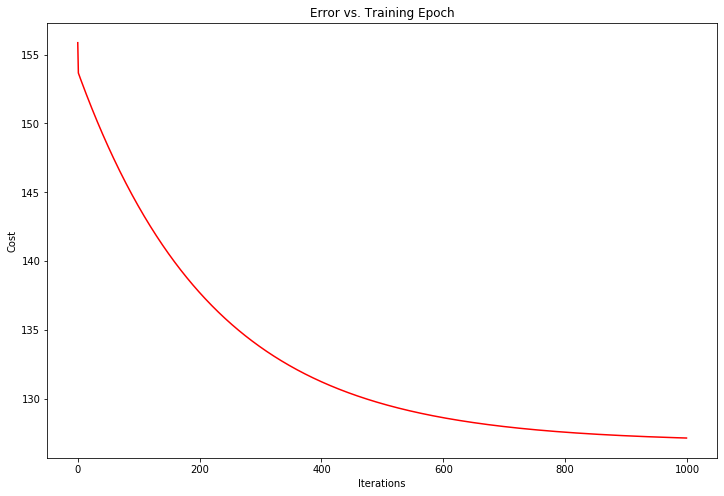

In [270]:
#Verify value of alpha
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

[Text(0, 0.5, 'Number of people diagnosed'),
 Text(0.5, 0, 'Date'),
 Text(0.5, 1.0, 'Coronavirus in Colombia')]

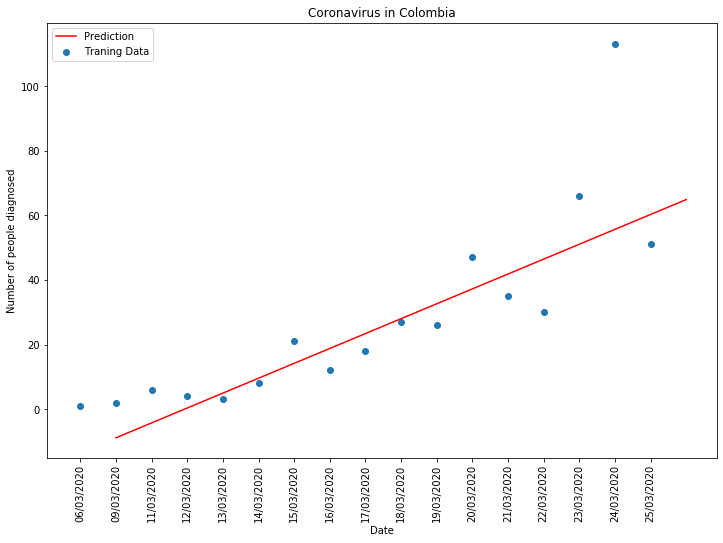

In [274]:
x = np.linspace(freq.dia.min(), freq.dia.max(), 100)
f = g[0, 0] + (g[0, 1] * x)
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(freq.fecha_de_diagnostico, freq.frecuencia, label='Traning Data')
ax.legend(loc=2)
plt.xticks(rotation=90)
ax.set(xlabel="Date",
       ylabel="Number of people diagnosed",
       title="Coronavirus in Colombia")

### Logistic Model

In [289]:
from scipy.optimize import curve_fit
def log_model(x,a,b,c):
    return a/(1+np.exp(-(x-b)/c))

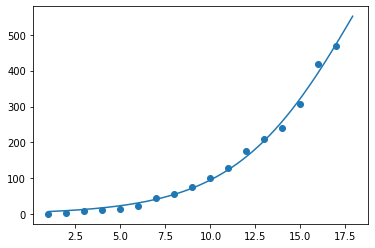

In [311]:
dia = freq['dia'].values.tolist()
enf = freq["frecuencia"].values.tolist()
series = pd.Series(enf)
cumsumcorona = series.cumsum()
fit = curve_fit(log_model,dia,cumsumcorona)#accumulated cases of coronavirus
x_plot = np.arange(min(dia), max(dia)+1, 0.1).tolist()
plt.scatter(dia,cumsumcorona)
plt.plot(x_plot,[log_model(i,fit[0][0],fit[0][1],fit[0][2]) for i in x_plot])